In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [3]:
df = pd.read_csv('german_credit_data.csv')


In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [6]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [7]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df=df.dropna()

In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

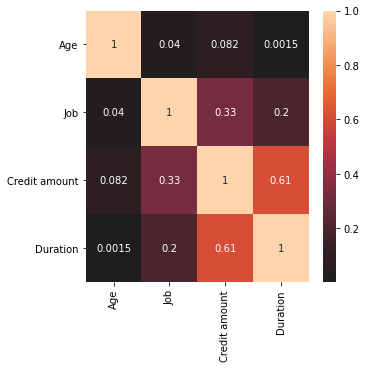

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), center=0, annot=True)
plt.show()

In [12]:
num_atribute=['Age' , 'Job' , 'Duration' , 'Credit amount']

cat_atribute=['Sex' , 'Housing' , 'Saving accounts' , 'Checking account' , 'Purpose' ]

In [13]:
le = LabelEncoder()

In [18]:
df['Risk']= le.fit_transform(df['Risk'])

In [19]:
X= df.drop(['Risk'], axis=1)
y= df['Risk']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
X_train[cat_atribute].head()

,Sex,Housing,Saving accounts,Checking account,Purpose
216,male,own,little,little,business
481,male,own,little,moderate,car
35,male,own,little,moderate,radio/TV
22,male,rent,little,little,car
109,male,own,quite rich,moderate,business


In [21]:
X_train[cat_atribute] = X_train[cat_atribute].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
X_train[cat_atribute].head()

,Sex,Housing,Saving accounts,Checking account,Purpose
216,1,1,0,0,0
481,1,1,0,1,1
35,1,1,0,1,5
22,1,2,0,0,1
109,1,1,2,1,0


In [23]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atribute])

array([[-0.33804133,  0.17472458, -0.30385218, -0.09630345],
       [-0.76825431,  0.17472458,  0.16312064, -0.71195614],
       [-0.85429691, -1.30840268,  1.79752554,  0.43491132],
       ...,
       [-0.42408393,  0.17472458, -0.77082501, -0.89377265],
       [-0.68221172,  0.17472458, -1.23779784, -0.98953366],
       [ 2.24323659,  1.65785185,  1.0970663 , -0.46867142]])

In [24]:
a = X_train[cat_atribute]
b = ss.transform(X_train[num_atribute])

Xtr = np.hstack([a,b])
Xtr.shape 

(365, 9)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atribute])
le = LabelEncoder()
X_test[cat_atribute] = X_test[cat_atribute].apply(le.fit_transform)
a1 = X_test[cat_atribute]
b1 = ss.transform(X_test[num_atribute])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(157, 9)

In [27]:
y_pred = knn.predict(Xtr1)

In [28]:
confusion_matrix(y_test, y_pred)

array([[35, 32],
       [29, 61]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_pred)

0.6114649681528662

In [31]:
from sklearn.metrics import precision_recall_fscore_support

In [32]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.546875  , 0.65591398]),
 array([0.52238806, 0.67777778]),
 array([0.53435115, 0.66666667]),
 array([67, 90], dtype=int64))

In [34]:
from sklearn.metrics import precision_score

In [35]:
precision_score(y_test, y_pred)

0.6559139784946236

In [36]:
from sklearn.metrics import recall_score

In [37]:
recall_score(y_test, y_pred)

0.6777777777777778

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(y_test, y_pred)

0.6666666666666666

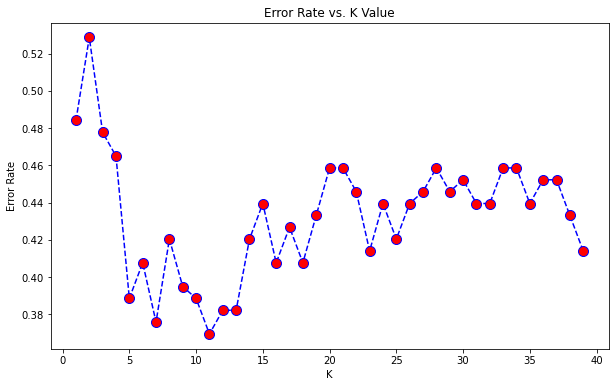

Minimum error:- 0.3694267515923567 at K = 11


In [40]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [41]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [42]:
y_pred = knn.predict(Xtr1)

In [43]:
accuracy_score(y_test, y_pred)

0.6050955414012739